In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [61]:
X, y = data[:, 1:], data[:, 0]

In [62]:
y_hot = to_categorical(data[:, 0], num_classes=10)

In [9]:
data[:, 0][:10]

array([5, 7, 9, 5, 2, 0, 6, 5, 5, 2], dtype=uint8)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [11]:
y_train.shape

(13399, 10)

In [12]:
# plt.scatter(X[:, 0], X[:, 1], c=y)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(units=400, activation="sigmoid", input_shape=(784,)))
model.add(Dense(units=200, activation="sigmoid"))
model.add(Dense(units=50, activation="sigmoid"))
model.add(Dense(units=10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 404,760
Trainable params: 404,760
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size=2000, epochs=10)

Train on 13399 samples
Epoch 1/10
13399/13399 [==============================] - 2s 143us/sample - loss: 2.3591 - accuracy: 0.1494
Epoch 2/10
13399/13399 [==============================] - 1s 49us/sample - loss: 2.0749 - accuracy: 0.4801
Epoch 3/10
13399/13399 [==============================] - 1s 49us/sample - loss: 1.8719 - accuracy: 0.6097
Epoch 4/10
13399/13399 [==============================] - 1s 62us/sample - loss: 1.6650 - accuracy: 0.6829
Epoch 5/10
13399/13399 [==============================] - 1s 53us/sample - loss: 1.4684 - accuracy: 0.7571
Epoch 6/10
13399/13399 [==============================] - 1s 50us/sample - loss: 1.2852 - accuracy: 0.8017
Epoch 7/10
13399/13399 [==============================] - 1s 51us/sample - loss: 1.1221 - accuracy: 0.8246
Epoch 8/10
13399/13399 [==============================] - 1s 53us/sample - loss: 0.9854 - accuracy: 0.8505
Epoch 9/10
13399/13399 [==============================] - 1s 55us/sample - loss: 0.8701 - accuracy: 0.8671
Epoch 10/10
1

In [19]:
model.evaluate(X_test, y_test, verbose=0)

[0.7558581207737778, 0.8771212]

In [20]:
from tensorflow.keras.preprocessing.image import load_img

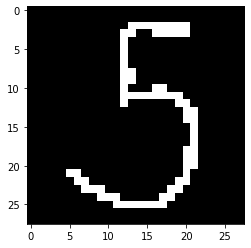

In [57]:
img = load_img("../datasets/nums/five.jpeg", grayscale=True, target_size=(28, 28))

X_item = ((255 - np.array(img)) > 150).astype(int) * 255

plt.imshow(X_item, cmap="gray")

In [60]:
model.predict(np.array([X_item.flatten()])).argsort(axis=1)

array([[4, 0, 5, 1, 8, 9, 6, 7, 2, 3]])

In [59]:
X_train.max()

255

In [64]:
fives = X[y==5]

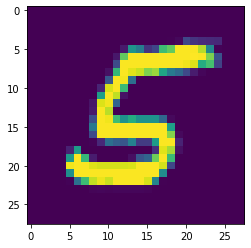

In [67]:
plt.imshow(fives[100].reshape(28, 28))